Installare le due librerie indicate sotto

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
path = "../Dataset FFF/"

In [3]:
path_graph = '../Dataset FFF/Graph_data/'

In [4]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [5]:
community_path = "../Dataset FFF/Community_task/"

In [6]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [7]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [8]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

# 1 - Louvain

Parametri ottimizzati con grid_search

In [19]:
res_df = {"randomize": [], "resolution":[], "AID": [], "IED": [], "Conductance":[], "Modularity": [], "N_Community": [], "Max_Dim_Community": []}


In [22]:
for j in [True, False]:
    for i in [x/10 for x in range(0, 10)]:   
        print(f"> Louvain opt for resolution = {i} and randomize = {j}")
        
        res_df["randomize"].append(j)
        res_df["resolution"].append(i)
        
        louvain_coms = cdlib.algorithms.louvain(G, weight = "Count", resolution=i, randomize=j)
        res_df["AID"].append(louvain_coms.average_internal_degree().score)
        res_df["IED"].append(louvain_coms.internal_edge_density().score)
        res_df["Conductance"].append(louvain_coms.conductance().score)
        res_df["Modularity"].append(louvain_coms.newman_girvan_modularity().score)
        res_df["N_Community"].append(len(louvain_coms.communities))
        max_com_len = 0
        for com in louvain_coms.communities:
            if len(com) > max_com_len:
                max_com_len = len(com)
        res_df["Max_Dim_Community"].append(max_com_len)
        
        print("************ ------------------ *******")
final_df = pd.DataFrame(res_df)
final_df.to_csv(community_path+"louvain_grid_result.csv", index=False)

> Louvain opt for resolution = 0.0 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.1 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.2 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.3 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.4 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.5 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.6 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.7 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.8 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.9 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.0 and r

In [23]:
final_df = pd.read_csv(community_path+"louvain_grid_result.csv")

In [24]:
final_df.loc[[1, 2, 3, 4, 5, 6, 7, 8, 9]]

,randomize,resolution,AID,IED,Conductance,Modularity,N_Community,Max_Dim_Community
1,True,0.1,0.816267,0.414980,0.790243,0.083465,1449,7348
2,True,0.2,0.931410,0.430083,0.790165,0.128235,1631,6612
3,True,0.3,1.123639,0.469972,0.769258,0.163168,1601,6309
4,True,0.4,1.204570,0.484769,0.771013,0.180293,1746,5630
5,True,0.5,1.281650,0.510109,0.761103,0.255758,1839,4777
6,True,0.6,2.379355,0.889191,0.530234,0.312964,939,5953
7,True,0.7,2.644482,0.936425,0.499259,0.337972,933,5546
8,True,0.8,2.983380,0.864229,0.253279,0.385970,205,5993
9,True,0.9,2.161152,0.911883,0.360279,0.410197,339,4751


Ottimizzazione con randomsearch

In [9]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
parameters = [resolution]

In [10]:
louvain_coms, scoring = ensemble.grid_search(graph=G, method=algorithms.louvain,
                                                       parameters=parameters,
                                                       quality_score=evaluation.newman_girvan_modularity, aggregate=max)

In [11]:
print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(louvain_coms.communities, louvain_coms.method_parameters, scoring))

Communities:
 [['kohleausstieg', 'energiewende', 'eu', 'erneuerbare', 'israel', 'klimaneutralität', 'ee', 'eeg2021', 'klimaneutral2050', 'klimakrise', 'berlin', 'klimastreik', 'deutschland', 'kernenergie', 'atom', 'eeg', 'klimapaket', 'abfckpraemie', 'schweiz', 'solarwirtschaft', 'speicher', 'es2050', '10vor10', 'wärme', 'waermeinitiative', 'co2gesetz', 'srfclub', 'usa', 'scientists4future', 'energiekrise', 'klimawandel', 'blackout', 'neubauer', 'uranium', 'video', 'scientistsforfuture', 'stromausfall', 'mondaymotivation', 'globalisierung', 'fff', 'klimaschutz', 'klima', 'rassismus', 'verkehrswende', 'endegelaende', 'hamburg', 'parentsforfuture', 'futureforfridays', 'nigeria', 'ourhouseisonfire', 'alledörferbleiben', 'corona', 'earthhour', 'luetzerath', 'merkel', 'meintwitterjubiläum', 'salzburg', 'konzert', 'greenpeace', 'trump', 'zukunft', 'fightfor15', 'systemchangenotclimatechange', 'endegelände', 'fighteverycrisis', 'extinctionrebelion', 'afdverbot', 'groko', 'keingradweiter', 'da

In [9]:
louvain_coms = cdlib.algorithms.louvain(G, weight = "Count", resolution=0.8)

In [10]:
with open(community_path+'louvain.pickleko', 'wb') as f:
    pickle.dump(louvain_coms, f)

In [11]:
print(print_bold_str("Average Internal Degree:"), louvain_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), louvain_coms.internal_edge_density())
print(print_bold_str("Conductance:"), louvain_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), louvain_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), louvain_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), louvain_coms.modularity_density())
print(print_bold_str("Z Modularity:"), louvain_coms.z_modularity())
print(print_bold_str("Triangle Partecipation Ratio:"), louvain_coms.triangle_participation_ratio())

print(print_bold_str("N_Community:"), len(louvain_coms.communities))

max_com_len = 0
for com in louvain_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)   

Average Internal Degree: FitnessResult(min=1.0, max=14.150943396226415, score=2.9430987986635517, std=2.2694419069869896)
Internal Edge Density: FitnessResult(min=0.001762236082286152, max=1.0, score=0.8705083067482741, std=0.26498265590302317)
Conductance: FitnessResult(min=0.0, max=0.5, score=0.2492005807371472, std=0.15417218823927767)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.41533063500273093, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.3883684837028771, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=325.88458229279803, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=0.7999940281573937, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.7424739949040013, std=0.41229204243162165)
N_Community: 196
Max_Dim_Community: 5953


In [12]:
louvain_tuple = [tuple(x) for x in louvain_coms.communities]


{'5953': 1, '1059': 1, '806': 1, '660': 1, '418': 1, '289': 1, '123': 1, '63': 1, '60': 1, '53': 1, '52': 2, '32': 1, '19': 1, '15': 1, '14': 1, '13': 1, '12': 1, '10': 2, '9': 2, '8': 7, '7': 2, '6': 14, '5': 14, '4': 37, '3': 58, '2': 42}


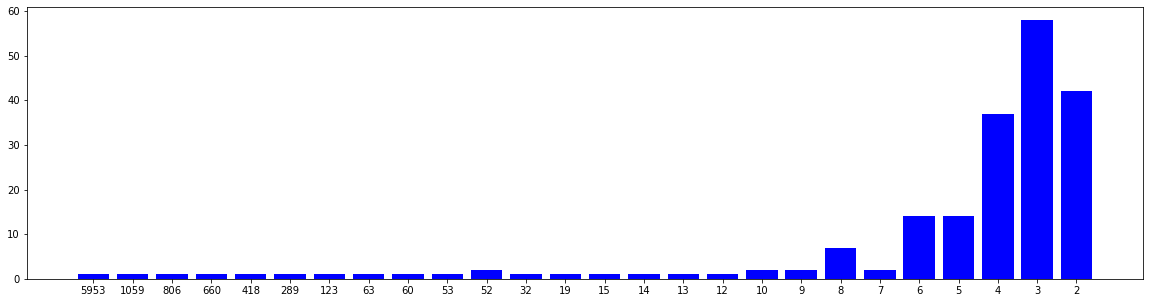

In [13]:
# Analizziamo la cardinalità delle communities
plot_communities_dimentions(louvain_tuple)

In [14]:
results = pquality.pquality_summary(G, louvain_tuple)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.001762,1.000000,0.870508,0.264983
Edges inside,1.000000,31220.000000,250.841837,2288.449992
Average Degree,1.000000,14.150943,2.943099,2.269442
FOMD,0.000000,0.500000,0.077302,0.151077
TPR,0.000000,1.000000,0.742474,0.412292
Expansion,0.000000,7.628788,1.280422,1.231387
Cut Ratio,0.000000,0.000786,0.000126,0.000124
Conductance,0.000000,0.500000,0.249201,0.154172
Normalized Cut,0.000000,0.500063,0.250728,0.154651


In [15]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.388368
